In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data from csv file
df=pd.read_csv('/kaggle/input/heart-disease-classification-dataset/heart disease classification dataset.csv')

# top 5 rows 
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [3]:
# shape of a dataset
df.shape

(303, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [5]:
# statistics of a dataset
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [6]:
# check nan values and duplicated values in a dataset
print(df.isnull().sum())
print("duplicate values:",df.duplicated().sum())

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64
duplicate values: 0


In [7]:
# fill nan values with mean 
df['trestbps'].fillna(np.mean(df['trestbps']),inplace=True)
df['chol'].fillna(np.mean(df['chol']),inplace=True)
df['thalach'].fillna(np.mean(df['thalach']),inplace=True)

# check nan values
df.isnull().sum().sum()

0

In [8]:
# show top 2 rows 
df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes


In [9]:
# drop Unnamed:0 column 
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


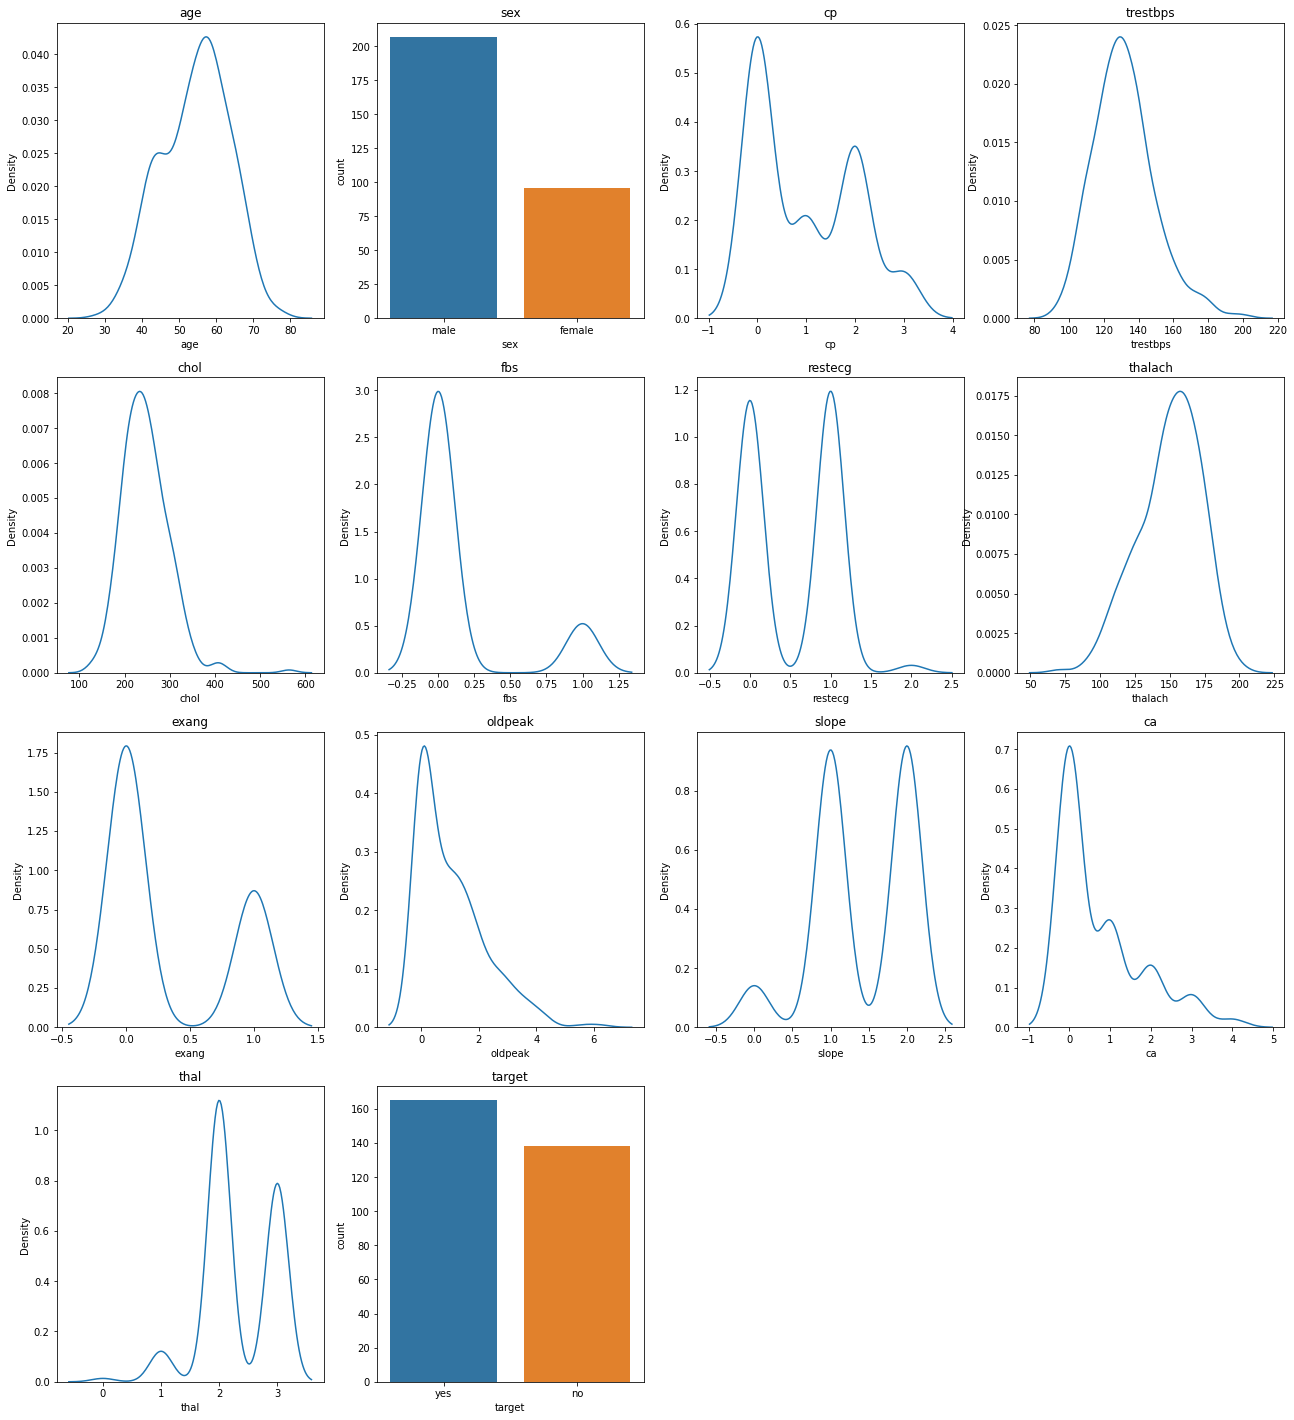

In [10]:
# EDA ( Exploratory Data Analysis )
# Univariante
column=df.columns
plt.figure(figsize=(22,25))
for i,col in enumerate(column,1):
    plt.subplot(4,4,i)
    
    try:
        plt.title(col)
        sns.kdeplot(data=df,x=col)
    except:
        plt.title(col)
        sns.countplot(data=df,x=col)
plt.show()
    


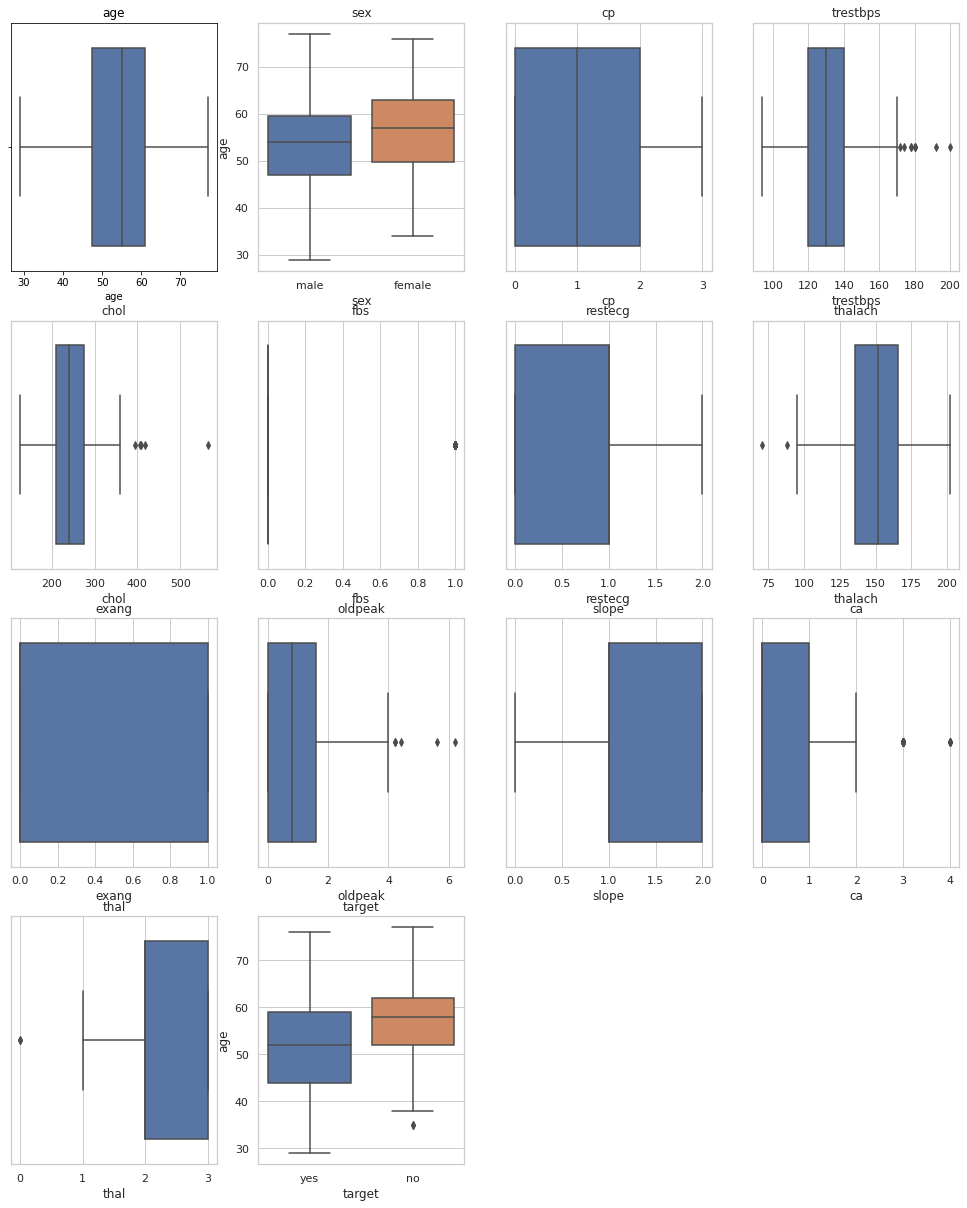

In [11]:
# check outliers
plt.figure(figsize=(17,21))
for i,col in enumerate(column,1):
    plt.subplot(4,4,i)
    sns.set_theme(style="whitegrid")
    
    try:
        plt.title(col)
        sns.boxplot(x=col,data=df)
    except:
        plt.title(col)
        sns.boxplot(x=col,y='age',data=df)
        
plt.show()


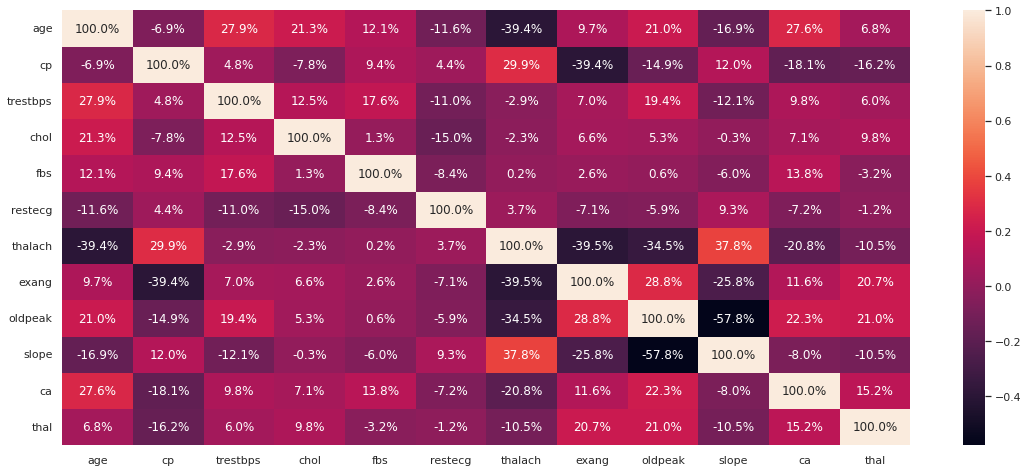

In [12]:
# Feature Selection
plt.figure(figsize=(19,8))
sns.heatmap(df.corr(),annot=True,fmt='.1%');

In [13]:
# onehotencoding in sex column and label encoding in target column
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('onehote',OneHotEncoder(handle_unknown='ignore'),['sex']),], remainder='drop')
d=ct.fit_transform(df)
new=pd.DataFrame(d)
new



,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
298,1.0,0.0
299,0.0,1.0
300,0.0,1.0
301,0.0,1.0


In [14]:
df=pd.concat([df,new],axis=1)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0,1
0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes,0.0,1.0
1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes,0.0,1.0
2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes,1.0,0.0
3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes,0.0,1.0
4,57,female,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes,1.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0,1
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,0.0,1.0
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,0.0,1.0
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,1.0,0.0


In [17]:
df.drop(['sex',0],axis=1,inplace=True)
df.head(2)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,1
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1.0
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1.0


In [18]:
# chi testing
from sklearn.feature_selection import chi2

X = df.drop('target',axis=1)
y = df['target']
chi_scores = chi2(X,y)
chi_scores

(array([ 23.28662399,  62.59809791,  14.01145653,  24.57443847,
          0.20293368,   2.97827075, 169.31230248,  38.91437697,
         72.64425301,   9.8040952 ,  66.44076512,   5.79185297,
          7.57683451]),
 array([1.39567266e-06, 2.53498179e-15, 1.81700165e-04, 7.14938375e-07,
        6.52363208e-01, 8.43893904e-02, 1.04560638e-38, 4.42807388e-10,
        1.55258340e-17, 1.74123685e-03, 3.60567663e-16, 1.61006098e-02,
        5.91231763e-03]))

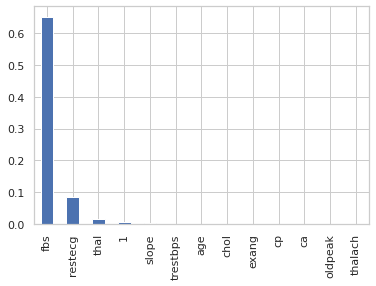

In [19]:
p_values = pd.Series(chi_scores[1],index = X.columns)


p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar();

In [20]:
X.drop('fbs',axis=1,inplace=True)

In [21]:
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 9.52196602e-01,  1.97312292e+00,  7.60032380e-01, ...,
        -7.14428871e-01, -2.14887271e+00,  6.81005225e-01],
       [-1.91531289e+00,  1.00257707e+00, -9.79452753e-02, ...,
        -7.14428871e-01, -5.12921878e-01,  6.81005225e-01],
       [-1.47415758e+00,  3.20312162e-02, -9.79452753e-02, ...,
        -7.14428871e-01, -5.12921878e-01, -1.46841752e+00],
       ...,
       [ 1.50364073e+00, -9.38514634e-01,  7.02833870e-01, ...,
         1.24459328e+00,  1.12302895e+00,  6.81005225e-01],
       [ 2.90463642e-01, -9.38514634e-01, -1.62567944e-15, ...,
         2.65082205e-01,  1.12302895e+00,  6.81005225e-01],
       [ 2.90463642e-01,  3.20312162e-02, -9.79452753e-02, ...,
         2.65082205e-01, -5.12921878e-01, -1.46841752e+00]])

In [22]:
# model Selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
def best_model(model,X,y):
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)
    print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
    model.fit(xtrain,ytrain)
    print('Train Score',model.score(xtrain,ytrain))
    pred=model.predict(xtest)
    print('Prediction Score',accuracy_score(pred,ytest))
    print('Test Score',model.score(xtest,ytest))
    print("***********************************************")
    print(confusion_matrix(ytest,pred))
    print("***********************************************")
    print("Precision Score",precision_score(ytest,pred))
    print("Recall Score",recall_score(ytest,pred))
    
    

In [23]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
best_model(lr,X,y)

(227, 12) (76, 12) (227,) (76,)
Train Score 0.8854625550660793
Prediction Score 0.8026315789473685
Test Score 0.8026315789473685
***********************************************
[[26  8]
 [ 7 35]]
***********************************************
Precision Score 0.813953488372093
Recall Score 0.8333333333333334


In [24]:
# svc
from sklearn.svm import SVC
svc=SVC()
best_model(svc,X,y)

(227, 12) (76, 12) (227,) (76,)
Train Score 0.9074889867841409
Prediction Score 0.8421052631578947
Test Score 0.8421052631578947
***********************************************
[[27  7]
 [ 5 37]]
***********************************************
Precision Score 0.8409090909090909
Recall Score 0.8809523809523809


In [25]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
best_model(dt,X,y)

(227, 12) (76, 12) (227,) (76,)
Train Score 1.0
Prediction Score 0.75
Test Score 0.75
***********************************************
[[25  8]
 [11 32]]
***********************************************
Precision Score 0.8
Recall Score 0.7441860465116279


In [26]:
import xgboost
xg=xgboost.XGBClassifier()
best_model(xg,X,y)

(227, 12) (76, 12) (227,) (76,)
[15:04:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train Score 1.0
Prediction Score 0.8026315789473685
Test Score 0.8026315789473685
***********************************************
[[29  6]
 [ 9 32]]
***********************************************
Precision Score 0.8421052631578947
Recall Score 0.7804878048780488


In [27]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
best_model(rf,X,y)

(227, 12) (76, 12) (227,) (76,)
Train Score 1.0
Prediction Score 0.7368421052631579
Test Score 0.7368421052631579
***********************************************
[[27 14]
 [ 6 29]]
***********************************************
Precision Score 0.6744186046511628
Recall Score 0.8285714285714286


In [28]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5 )  
best_model(classifier,X,y)


(227, 12) (76, 12) (227,) (76,)
Train Score 0.9030837004405287
Prediction Score 0.75
Test Score 0.75
***********************************************
[[20 12]
 [ 7 37]]
***********************************************
Precision Score 0.7551020408163265
Recall Score 0.8409090909090909


In [29]:
# hyperparameter tuning Random Forest classifier perform well in my case
# random forest hyperameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

rf=RandomForestClassifier(n_jobs=-1)
parameter={
    'n_estimators':[500,600,700,800],
    'max_depth':[2,6,4,8,10,12],
    'criterion':['gini','entropy']
}
gs=GridSearchCV(rf,param_grid=parameter,n_jobs=-1,cv=StratifiedKFold(),scoring = 'recall')
gs.fit(X,y)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 4, 8, 10, 12],
                         'n_estimators': [500, 600, 700, 800]},
             scoring='recall')

In [30]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 600}

In [31]:
gs.best_score_

0.9272727272727274

In [32]:
# final model
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=2,n_estimators=600)
best_model(rf,X,y)


(227, 12) (76, 12) (227,) (76,)
Train Score 0.8810572687224669
Prediction Score 0.8157894736842105
Test Score 0.8157894736842105
***********************************************
[[20 12]
 [ 2 42]]
***********************************************
Precision Score 0.7777777777777778
Recall Score 0.9545454545454546
